In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',80)

In [2]:
data = pd.read_csv(filepath_or_buffer='./startups/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
categorical_feature_mask = data.dtypes==object
categorical_cols = data.columns[categorical_feature_mask].tolist()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labelencodedDF = data[categorical_cols].apply(lambda each_column : label_encoder.fit_transform(each_column))
data.loc[:,tuple(categorical_cols)] = labelencodedDF

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = OneHotEncoder(categories='auto', drop='first')
ct = ColumnTransformer([('encoder', one_hot_enc, categorical_cols)], remainder='passthrough')
X_state_onehot_encoded = ct.fit_transform(data[categorical_cols])
onehot_cols = ["State_"+str(int(i)) for i in range(X_state_onehot_encoded.shape[1])]
df_onehot = pd.DataFrame(X_state_onehot_encoded, columns = onehot_cols)
data = pd.concat([data, df_onehot], axis=1)
data.drop(labels=['State'],axis=1,inplace=True)
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_0,State_1
0,165349.20,136897.80,471784.10,192261.83,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,1.0,0.0


In [5]:
y = data[['Profit']]
X = data[['R&D Spend','Administration','Marketing Spend','State_0','State_1']]

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = StandardScaler().fit_transform(X.values)
X = pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
X.head()

,R&D Spend,Administration,Marketing Spend,State_0,State_1
0,2.016411,0.560753,2.153943,-0.685994,1.393261
1,1.955860,1.082807,1.923600,-0.685994,-0.717741
2,1.754364,-0.728257,1.626528,1.457738,-0.717741
3,1.554784,-0.096365,1.422210,-0.685994,1.393261
4,1.504937,-1.079919,1.281528,1.457738,-0.717741


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X)
feature_variance_ratio = pca.explained_variance_ratio_

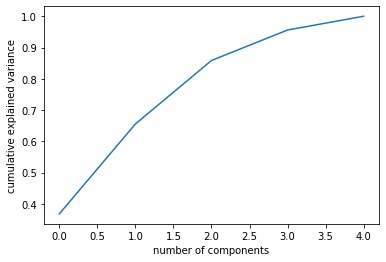

In [8]:
plt.plot(np.cumsum(feature_variance_ratio))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [9]:
pd.Series(data=feature_variance_ratio*100, index=X.columns)

R&D Spend          36.763019
Administration     28.770311
Marketing Spend    20.311912
State_0             9.746485
State_1             4.408273
dtype: float64

In [10]:
pca = PCA(n_components=3, svd_solver='auto')
reduced_dims = pca.fit_transform(X)
reduced_X = pd.DataFrame(data=reduced_dims, columns = ["PCA_"+str(int(i+1)) for i in range(reduced_dims.shape[1])])
reduced_X.head()

,PCA_1,PCA_2,PCA_3
0,-2.200702,2.535279,-0.283110
1,-2.534483,1.103097,0.507860
2,-2.695169,-0.591530,-1.031802
3,-1.338018,2.137096,-0.681816
4,-2.261616,-0.796331,-1.259845


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lin_Regressor = LinearRegression()
lin_Regressor.fit(X, y)
lin_Regressor.score(X, y)

0.9507524843355148